In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


In [2]:
#import pandas as pd
#df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv") 
#X = df.drop("purchaseValue", axis=1) 
#y = df['purchaseValue'] 
#from sklearn.dummy import DummyRegressor 
#model = DummyRegressor().fit(X,y) 
#X_test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv") 
#y_pred=model.predict(X_test) 

In [3]:
#submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "purchaseValue": y_pred}) 
#submission.to_csv('submission.csv',index=False)

In [4]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
test_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

In [5]:
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


In [6]:
test_df.head()

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,...,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1491433811,1,1491433811,6394,8,Region_1,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1489001815,1,1489001815,38969,8,Region_5,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(direct),1481559809,1,1481559809,69453,8,Region_3,not available in demo dataset,medium,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   userChannel                                   29006 non-null  object 
 1   date                                          29006 non-null  int64  
 2   browser                                       29006 non-null  object 
 3   device.browserSize                            29006 non-null  object 
 4   device.browserVersion                         29006 non-null  object 
 5   deviceType                                    29006 non-null  object 
 6   device.flashVersion                           29006 non-null  object 
 7   device.isMobile                               29006 non-null  bool   
 8   device.language                               29006 non-null  object 
 9   device.mobileDeviceBranding                   29006 non-null 

User & Session Metadata 
| Column          | Description                                          |
| --------------- | ---------------------------------------------------- |
| `userId`        | Unique ID for the user                               |
| `sessionId`     | Unique ID for a session (group of user interactions) |
| `sessionNumber` | The nth session for the user                         |
| `sessionStart`  | Timestamp (or similar) marking session start         |


Traffic Source
| Column                                         | Description                                               |
| ---------------------------------------------- | --------------------------------------------------------- |
| `trafficSource`                                | Source of the traffic (e.g., google, direct, referral)    |
| `trafficSource.isTrueDirect`                   | Whether the visit was truly direct (i.e., typed URL)      |
| `trafficSource.medium`                         | Medium (e.g., organic, cpc, referral)                     |
| `trafficSource.campaign`                       | Marketing campaign that led to the session                |
| `trafficSource.adContent`                      | Content of the ad (e.g., banner or ad copy text)          |
| `trafficSource.keyword`                        | Keyword used in search ads                                |
| `trafficSource.referralPath`                   | Full path of referring URL                                |
| `trafficSource.adwordsClickInfo.slot`          | Position of the ad (top, side)                            |
| `trafficSource.adwordsClickInfo.page`          | Page number of the ad click                               |
| `trafficSource.adwordsClickInfo.adNetworkType` | Type of ad network (e.g., Search, Content)                |
| `trafficSource.adwordsClickInfo.isVideoAd`     | Whether it was a video ad                                 |
| `gclIdPresent`                                 | Whether a Google Click ID (GCLID) is present (binary 0/1) |



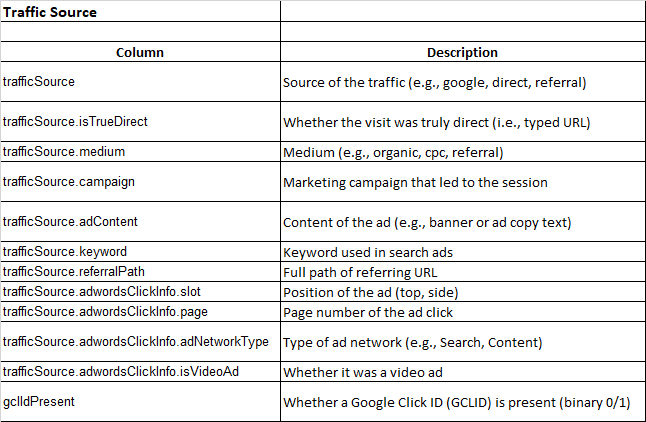
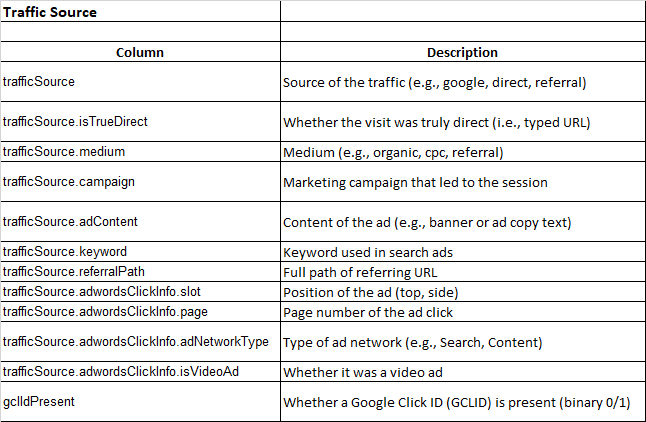
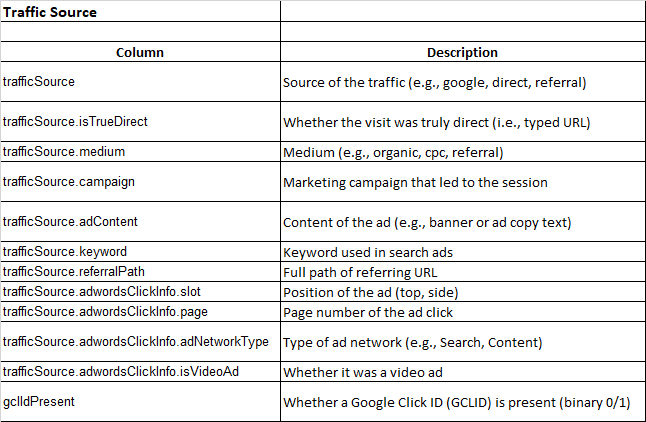
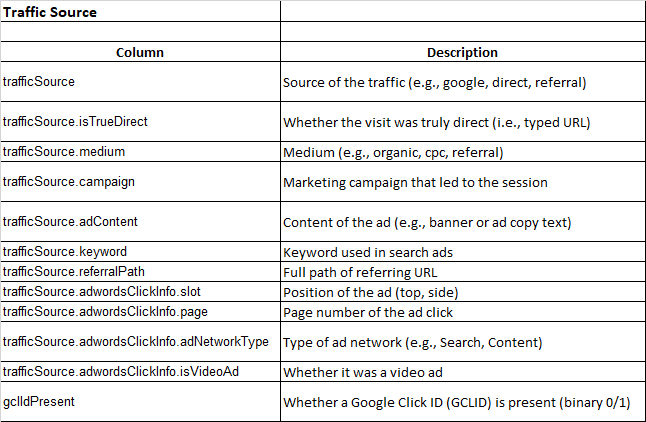

trafficSource.keyword

| Keyword                   | Meaning                                                                             |
| ------------------------- | ----------------------------------------------------------------------------------- |
| `"buy running shoes"`     | User searched for running shoes to purchase                                         |
| `"best budget laptops"`   | Likely someone in research mode                                                     |
| `"company name"`          | Branded search — user was looking for you                                           |
| `"discount travel deals"` | User wants deals, may be price sensitive                                            |
| `"(not set)"`             | Ad shown without keyword-level tracking (possibly due to auto-targeting or privacy) |
| `None` or `NaN`           | No keyword info (user didn't come via paid search)                                  |



trafficSource.adContent
| Example Value               | Description                                      |
| --------------------------- | ------------------------------------------------ |
| `"Free Trial Banner"`       | Ad highlighting a free trial                     |
| `"Summer Sale 20% Off"`     | Text related to a seasonal discount              |
| `"CTA-Red-Button"`          | Version of ad using a red call-to-action button  |
| `"Google Display Ad 1"`     | A specific ad from Google Display Network        |
| `"Homepage Promo A"`        | Version A of a homepage promotional ad           |
| `"Dynamic Ad Copy - Shoes"` | Dynamic ad personalized to a shoe-related search |
| `"Retargeting Banner 2"`    | Retargeting ad for visitors who didn’t convert   |

trafficSource.medium

| Medium      | Meaning                                                               |
| ----------- | --------------------------------------------------------------------- |
| `organic`   | Free search engine traffic (e.g., Google search results not from ads) |
| `cpc`       | Paid traffic via cost-per-click ads (e.g., Google Ads)                |
| `referral`  | A user clicked a link on another site (not search engines or ads)     |
| `none`      | Direct traffic (user typed URL or used bookmark)                      |
| `email`     | Came from an email campaign                                           |
| `affiliate` | Came through an affiliate marketing partner                           |
| `social`    | Came via a social media platform (e.g., Facebook, Twitter)            |

trafficSource.adwordsClickInfo.slot'
| Slot Value      | Meaning                                                                                        |
| --------------- | ---------------------------------------------------------------------------------------------- |
| `"Top"`         | The ad was shown at the **top of the search results page** (above organic results)             |
| `"Right"`       | The ad was shown on the **right-hand side** of the page (common before Google's layout update) |
| `"Bottom"`      | The ad was displayed **below** the organic results                                             |
| `NaN` or `None` | No slot info — user didn’t come via an AdWords ad or data not recorded                         |


Example Values in trafficSource.campaign:

| Campaign Name            | What It Likely Means                                                |
| ------------------------ | ------------------------------------------------------------------- |
| `spring_sale`            | A campaign promoting a spring discount                              |
| `brand-awareness-2024`   | A branding-focused ad effort                                        |
| `black_friday_deals`     | Seasonal promotion for Black Friday                                 |
| `retargeting_campaign_1` | A retargeting campaign targeting returning visitors                 |
| `(not set)`              | No campaign was set — user likely came via direct or organic search |
| `affiliates`             | Traffic from affiliate marketers                                    |
| `google/cpc`             | Default for paid search from Google Ads                             |


The 'trafficSource' column in your dataset likely refers to the overall source of the user's visit.
* trafficSource.medium : 7 unique values
* trafficSource.campaign : 28 unique values
* trafficSource.keyword : 566 unique values
* trafficSource.adContent : 53 unique values
  
trafficSource.referralPath':
* trafficSource.referralPath'
* trafficSource': example.com'
* trafficSource.referralPath': /articles/how-to-buy


trafficSource.adwordsClickInfo.page
| Value | Meaning                                                     |
| ----- | ----------------------------------------------------------- |
| `1.0` | The ad was clicked on the **first page** of search results. |
| `2.0` | Click came from the **second page** of results.             |
| `5.0` | The user clicked the ad on **page 5** of results.           |


The field trafficSource.adwordsClickInfo.adNetworkType is typically found in web analytics or advertising data, especially in datasets coming from Google Analytics or Google Ads integration.

What it represents:
* Possible values of adNetworkType include:
* Search Network: The click came from a Google Search ad.
* Display Network: The click came from a Google Display Network ad.
* Search partners: The click came from one of Google's search partners.
* YouTube Search or YouTube Videos (sometimes): If the ad was shown on YouTube.

Use case:
This field is useful for analyzing which ad networks perform best in driving traffic and conversions, so you can optimize your ad spend and campaign targeting.

Device & Browser Info
| Column                             | Description                                       |
| ---------------------------------- | ------------------------------------------------- |
| `browser`                          | Full browser name (e.g., Chrome, Safari)          |
| `browserMajor`                     | Major browser version (e.g., Chrome 115)          |
| `device.browserVersion`            | Specific version of the browser                   |
| `deviceType`                       | Type of device (mobile, desktop, tablet)          |
| `device.language`                  | Language setting of the browser/device            |
| `device.operatingSystemVersion`    | OS version (e.g., iOS 14)                         |
| `device.flashVersion`              | Flash plugin version (outdated but still tracked) |
| `device.screenResolution`          | Screen resolution (e.g., 1920x1080)               |
| `device.browserSize`               | Browser window size (not necessarily screen size) |
| `device.screenColors`              | Color depth of the screen                         |
| `device.isMobile`                  | Whether the device is mobile (True/False)         |
| `device.mobileDeviceBranding`      | Brand of the mobile device (e.g., Samsung)        |
| `device.mobileDeviceMarketingName` | Marketing name (e.g., Galaxy S21)                 |
| `device.mobileDeviceModel`         | Device model (e.g., SM-G991U)                     |
| `device.mobileInputSelector`       | Method of user input (touch, mouse, etc.)         |



Geolocation
| Column                       | Description                                             |
| ---------------------------- | ------------------------------------------------------- |
| `geoNetwork.city`            | City of the user                                        |
| `geoNetwork.metro`           | Metro area (e.g., Bay Area)                             |
| `geoNetwork.region`          | State/province/region                                   |
| `geoNetwork.subContinent`    | Subcontinent (e.g., Northern Europe)                    |
| `geoNetwork.continent`       | Continent (e.g., Asia)                                  |
| `geoNetwork.networkLocation` | ISP or network name                                     |
| `geoNetwork.networkDomain`   | Domain of network provider                              |
| `geoCluster`                 | Custom geographic clustering or segmentation            |
| `locationCountry`            | Country name                                            |
| `locationZone`               | Custom zone/country group, may be internal segmentation |


| Column                       | Unique Values |
| ---------------------------- | ------------- |
| `geoCluster`                 | 5             |
| `geoNetwork.networkDomain`   | 3             |
| `geoNetwork.region`          | 388           |
| `geoNetwork.networkLocation` | 1             |
| `geoNetwork.subContinent`    | 23            |
| `geoNetwork.city`            | 695           |
| `geoNetwork.metro`           | 104           |
| `geoNetwork.continent`       | 6             |
| `Location Country    `       | 193           |

 

This dataset captures detailed session-level information from a large-scale digital commerce platform. Each row corresponds to a unique user session and includes data on user behavior, acquisition channels, device information, and geographical location.

Participants are expected to predict the purchaseValue, which represents the total amount spent during a given session.

Key Feature Categories
User Behavior & Session Metrics

totalHits, pageViews, totals.bounces, new_visits, totals.visits: Indicators of user engagement and session activity.
sessionNumber, sessionStart: Information related to session sequence and timing.
Device & Technical Attributes

deviceType, os, browser, screenSize, device.browserSize, device.language: Details about the user's device and browsing environment.
browserMajor, device.*: Encompasses a variety of device-level descriptors such as model, version, and screen specifications.
gclIdPresent: Signals the presence of a Google Click ID used in ad tracking.
Traffic & Marketing Source

userChannel, trafficSource, trafficSource.medium, trafficSource.keyword, trafficSource.campaign: Insights into how users arrived at the platform.
trafficSource.adwordsClickInfo.*: Contains attributes from advertising sources, including ad network type and slot.
trafficSource.adContent, trafficSource.referralPath, trafficSource.isTrueDirect: Provide further attribution details.
Geographical Context

geoNetwork.city, locationCountry, geoNetwork.continent, geoNetwork.subContinent, geoNetwork.metro, geoNetwork.region: Geographic identifiers to help understand regional behavior trends.
geoCluster, locationZone: Groupings based on geographic or behavioral patterns.
Identifiers

userId, sessionId: Unique identifiers for each user and session, allowing for multi-session analysis.
Target Variable

purchaseValue: The amount (in currency units) spent by the customer during the session. This is the target variable to be predicted.


In [9]:
train_df.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


| **Column**                              | **Meaning**                                                                       | **Insight from Summary**                                                                           |
| --------------------------------------- | --------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| **purchaseValue**                       | The total monetary value (revenue) from the user’s session(s)                     | Mostly **zero** (mean ≈ 26M but median is 0), very **skewed** with some large outliers (max ≈ 23B) |
| **userId**                              | Anonymized unique identifier for each user                                        | Range: 0 to \~122K, probably uniquely identifies each user                                         |
| **gclIdPresent**                        | Flag (0/1) indicating if a Google Click ID (from an ad) was present               | Mostly **0**, few ad-click users (mean ≈ 0.037)                                                    |
| **sessionNumber**                       | The number of the session (e.g., 1st, 2nd, etc.) in the user's lifetime           | Many users have only **1 session**, but some have **hundreds** (max = 447)                         |
| **totals.visits**                       | Usually reflects visits per user/session (in your case, always **1.0**)           | Constant = 1, not useful                                                                           |
| **sessionId**                           | Unique identifier for each session                                                | Large range (looks like timestamps), might not need direct use in modeling                         |
| **trafficSource.adwordsClickInfo.page** | Page number where ad was clicked (from AdWords)                                   | Only 4281 non-null rows; usually **1**, rarely goes up to **5**                                    |
| **pageViews**                           | Number of pages viewed in the session                                             | Mean = 8.4, but some sessions have **469 pageviews** = potential bots or extreme engagement        |
| **locationZone**                        | Some custom or derived regional zone grouping (e.g., time zones, business zones?) | Only value = **8** — likely not informative                                                        |
| **totals.bounces**                      | Did the user leave the site without interaction (0 = no, 1 = yes)                 | Only 47k non-null values, all are 1.0 = all bounced, so might be incorrectly populated             |
| **date**                                | Date of session (e.g., 20170806)                                                  | Ranges from \~201608xx to \~201804xx — good for time-based analysis                                |
| **totalHits**                           | Total hits (pageviews + events) during session                                    | Mean = 10.6, max = 500 — another measure of engagement                                             |
| **sessionStart**                        | Unix timestamp or derived session start ID                                        | Same range as `sessionId`; likely redundant                                                        |
| **new\_visits**                         | 1 if it’s the user’s **first session**, NaN otherwise                             | 80k non-null = 80k new users, value is always 1 if present                                         |


In [10]:
# Summary statistics
print(train_df['purchaseValue'].describe())

# Percentage of sessions with zero purchase
zero_pct = (train_df['purchaseValue'] == 0).mean() * 100
print(f"Zero purchase sessions: {zero_pct:.2f}%")


count    1.160230e+05
mean     2.656393e+07
std      2.051825e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: purchaseValue, dtype: float64
Zero purchase sessions: 79.33%


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


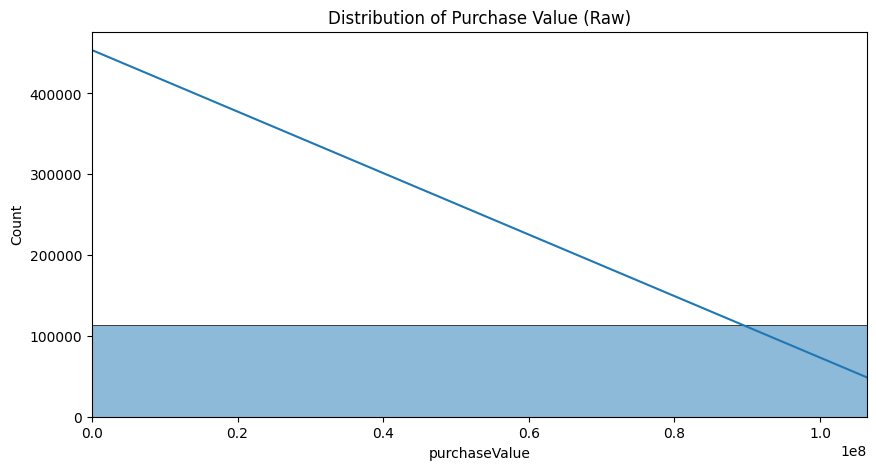

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.histplot(train_df['purchaseValue'], bins=100, kde=True)
plt.title('Distribution of Purchase Value (Raw)')
plt.xlabel('purchaseValue')
plt.ylabel('Count')
plt.xlim(0, train_df['purchaseValue'].quantile(0.95))  # focus on lower 95%
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


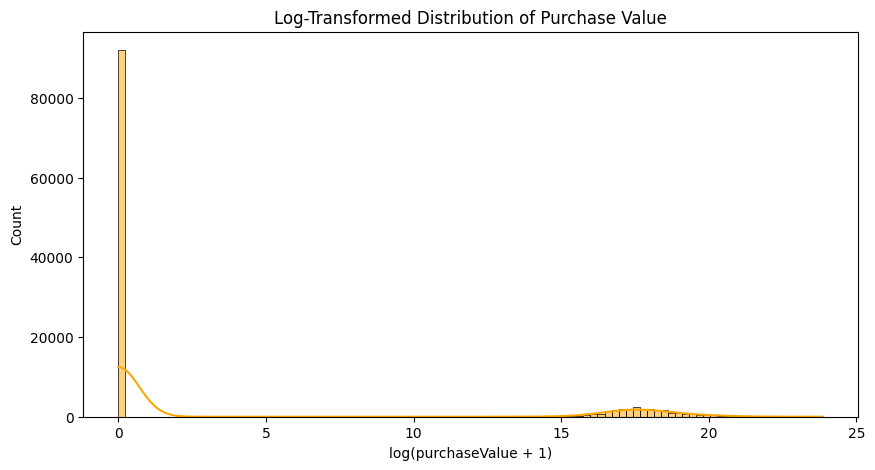

In [12]:
# Add a new column for log-transformed target
train_df['log_purchaseValue'] = np.log1p(train_df['purchaseValue'])  # log(1 + x)

# Plot log-transformed distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df['log_purchaseValue'], bins=100, kde=True, color='orange')
plt.title('Log-Transformed Distribution of Purchase Value')
plt.xlabel('log(purchaseValue + 1)')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_13/3566652255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero_purchases['log_purchaseValue'] = np.log1p(nonzero_purchases['purchaseValue'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


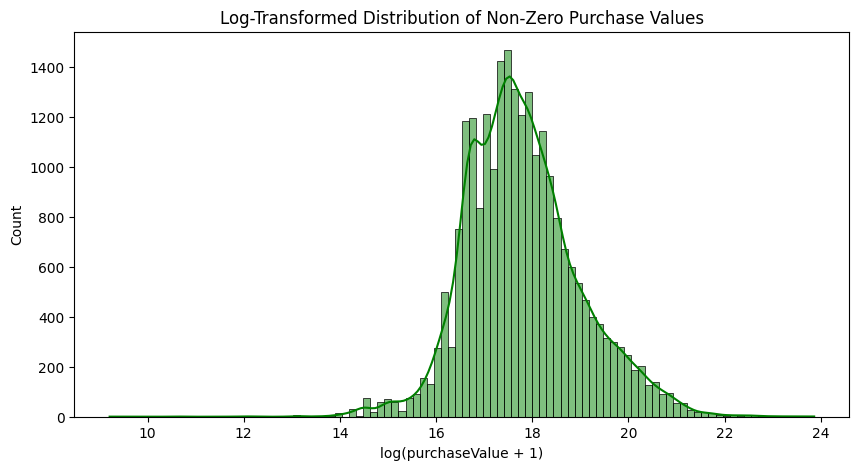

In [13]:
# Filter only non-zero purchase values
nonzero_purchases = train_df[train_df['purchaseValue'] > 0]

# Create log-transformed column (if not already)
nonzero_purchases['log_purchaseValue'] = np.log1p(nonzero_purchases['purchaseValue'])

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(nonzero_purchases['log_purchaseValue'], bins=100, kde=True, color='green')
plt.title('Log-Transformed Distribution of Non-Zero Purchase Values')
plt.xlabel('log(purchaseValue + 1)')
plt.ylabel('Count')
plt.show()


Zero purchase sessions: 92038
Non-zero purchase sessions: 23985


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


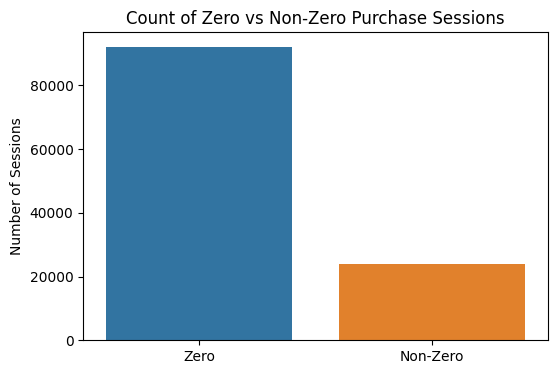

In [14]:
zero_count = (train_df['purchaseValue'] == 0).sum()
nonzero_count = (train_df['purchaseValue'] > 0).sum()

print(f"Zero purchase sessions: {zero_count}")
print(f"Non-zero purchase sessions: {nonzero_count}")

# Plot count comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Zero', 'Non-Zero'], y=[zero_count, nonzero_count])
plt.title('Count of Zero vs Non-Zero Purchase Sessions')
plt.ylabel('Number of Sessions')
plt.show()



Train - Missing Value Summary:

Test - Missing Value Summary:


,Missing Count,Missing %
trafficSource.adContent,113060,97.446196
trafficSource.adwordsClickInfo.slot,111742,96.310214
trafficSource.adwordsClickInfo.isVideoAd,111742,96.310214
trafficSource.adwordsClickInfo.adNetworkType,111742,96.310214
trafficSource.adwordsClickInfo.page,111742,96.310214
trafficSource.referralPath,73309,63.184886
trafficSource.isTrueDirect,73133,63.033192
trafficSource.keyword,71861,61.936857
totals.bounces,68875,59.363230
new_visits,35505,30.601691


,Missing Count,Missing %
trafficSource.adContent,28247,97.383300
trafficSource.adwordsClickInfo.adNetworkType,27899,96.183548
trafficSource.adwordsClickInfo.isVideoAd,27899,96.183548
trafficSource.adwordsClickInfo.page,27899,96.183548
trafficSource.adwordsClickInfo.slot,27899,96.183548
trafficSource.referralPath,18395,63.417914
trafficSource.isTrueDirect,18245,62.900779
trafficSource.keyword,17962,61.925119
totals.bounces,17274,59.553196
new_visits,8912,30.724678



Dropping 5 columns with >95% missing values.


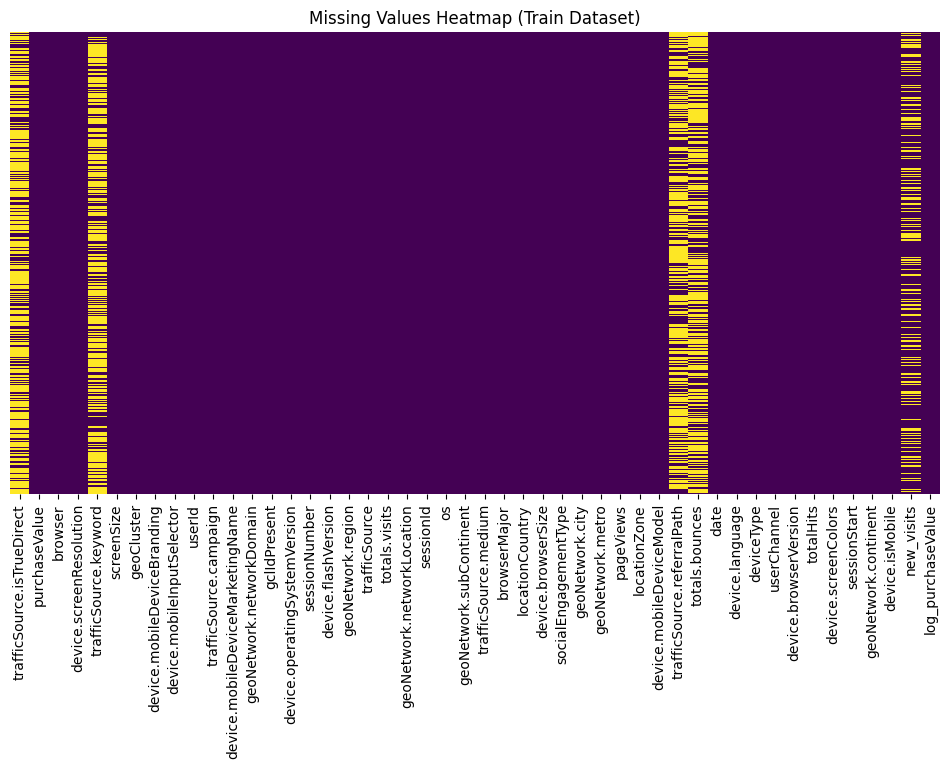

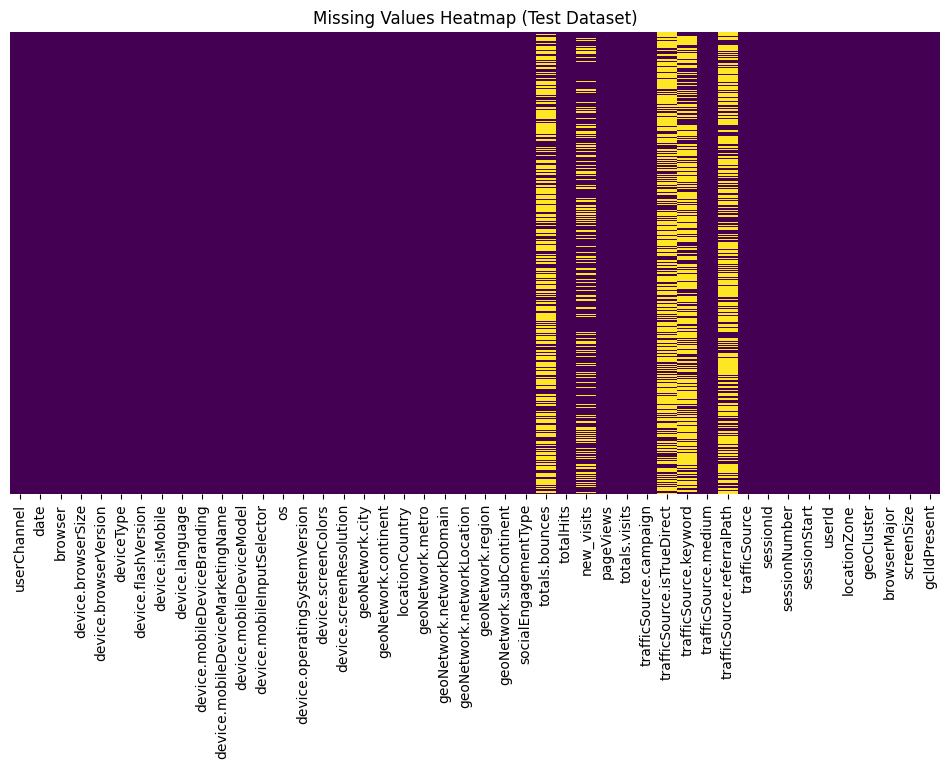

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_rows', 100)

# Step 1: Create a function to summarize missing values
def missing_value_summary(df, name='DataFrame'):
    missing = df.isnull().sum()
    percent = 100 * missing / len(df)
    summary = pd.DataFrame({'Missing Count': missing, 'Missing %': percent})
    summary = summary[summary['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
    print(f"\n{name} - Missing Value Summary:")
    return summary

# Step 2: Get missing value summaries
train_missing = missing_value_summary(train_df, 'Train')
test_missing = missing_value_summary(test_df, 'Test')

display(train_missing.head(10))  # Top 10 with highest missing % in train
display(test_missing.head(10))  # Top 10 with highest missing % in test

# Step 3: Drop columns with >95% missing values from both datasets
threshold = 95
drop_train_cols = train_missing[train_missing['Missing %'] > threshold].index
drop_test_cols = test_missing[test_missing['Missing %'] > threshold].index

# Union of columns to drop
columns_to_drop = list(set(drop_train_cols).union(set(drop_test_cols)))

print(f"\nDropping {len(columns_to_drop)} columns with >{threshold}% missing values.")

# Drop columns
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

# Step 4: Plot Missing Value Heatmap (after dropping columns)
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap (Train Dataset)')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(test_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap (Test Dataset)')
plt.show()


In [16]:
# Select numerical features of interest
num_cols = ['purchaseValue', 'pageViews', 'totalHits', 'sessionNumber', 'gclIdPresent']

# Compute correlation
correlation_matrix = train_df[num_cols].corr()

# Display correlation with purchaseValue
print("Correlation with purchaseValue:")
print(correlation_matrix['purchaseValue'].sort_values(ascending=False))


Correlation with purchaseValue:
purchaseValue    1.000000
totalHits        0.251651
pageViews        0.248454
sessionNumber    0.230585
gclIdPresent    -0.005652
Name: purchaseValue, dtype: float64


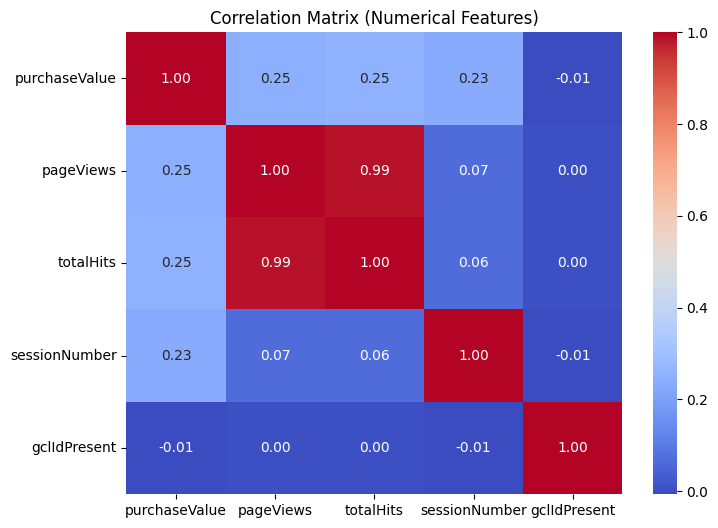

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


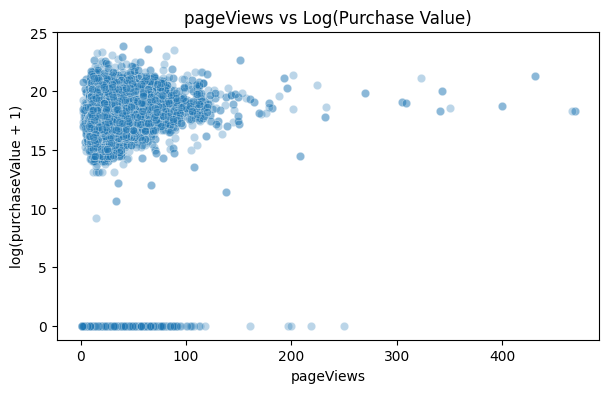

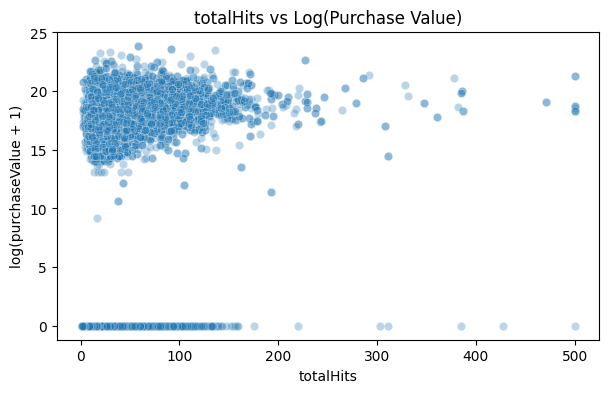

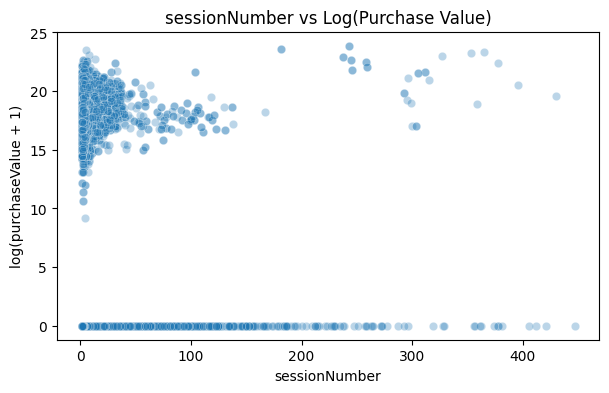

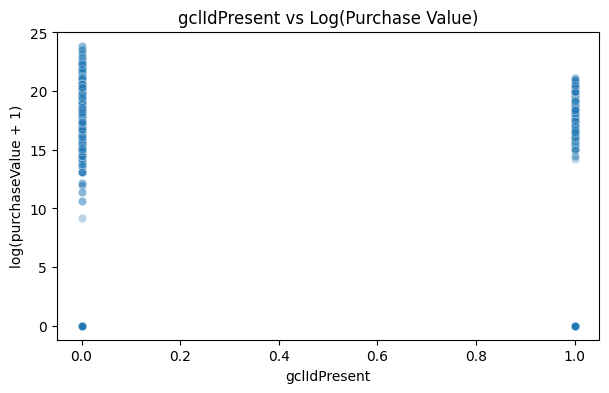

In [18]:
# Optional: use log-transformed target for better visualization
train_df['log_purchaseValue'] = np.log1p(train_df['purchaseValue'])

# Scatter plots
for col in ['pageViews', 'totalHits', 'sessionNumber', 'gclIdPresent']:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=train_df, x=col, y='log_purchaseValue', alpha=0.3)
    plt.title(f'{col} vs Log(Purchase Value)')
    plt.xlabel(col)
    plt.ylabel('log(purchaseValue + 1)')
    plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


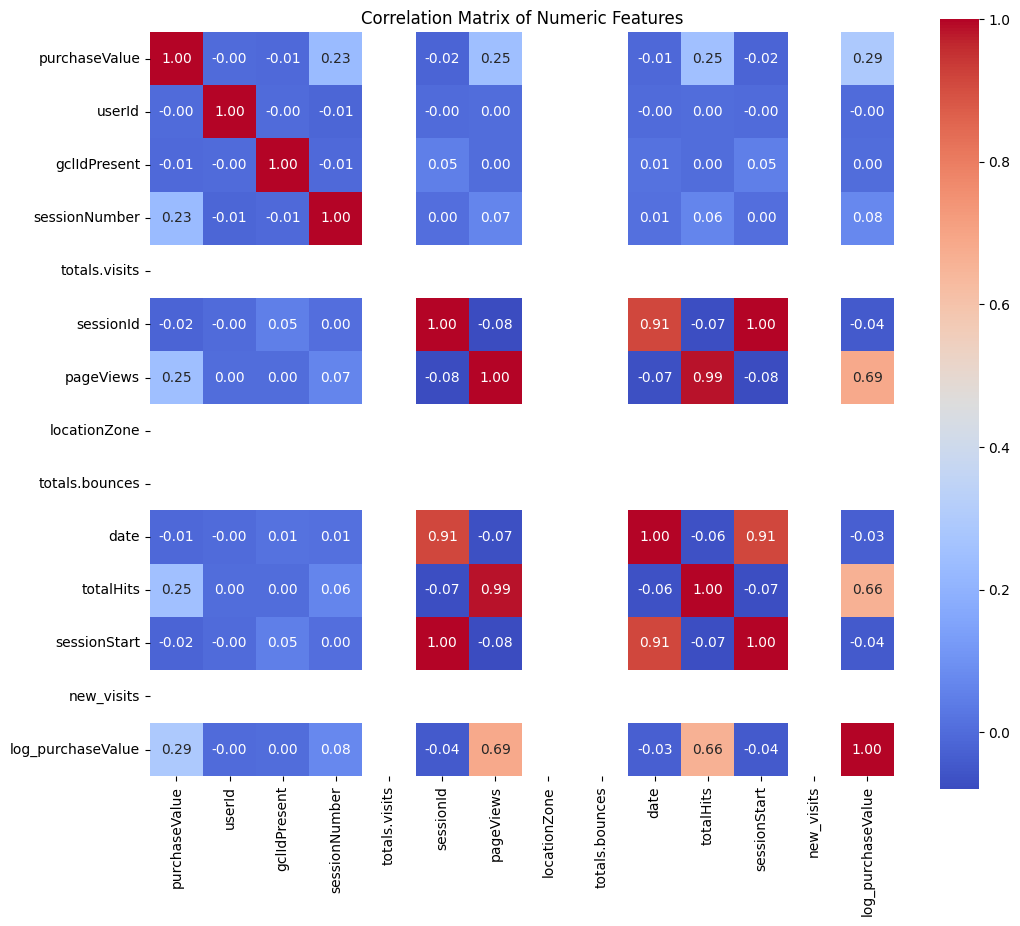

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns (excluding target for now)
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation matrix
corr_matrix = train_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [20]:
# Correlation of each numeric feature with purchaseValue
purchase_corr = corr_matrix['purchaseValue'].drop('purchaseValue').sort_values(ascending=False)

print("Correlation of features with purchaseValue:")
print(purchase_corr)


Correlation of features with purchaseValue:
log_purchaseValue    0.288212
totalHits            0.251651
pageViews            0.248454
sessionNumber        0.230585
userId              -0.003469
gclIdPresent        -0.005652
date                -0.010338
sessionStart        -0.018537
sessionId           -0.018537
totals.visits             NaN
locationZone              NaN
totals.bounces            NaN
new_visits                NaN
Name: purchaseValue, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [21]:
from scipy.stats import kruskal

categorical_cols = ['userChannel', 'browser', 'deviceType', 'trafficSource.medium']  # add more if needed

for col in categorical_cols:
    # Group purchaseValue by categories
    groups = [group['purchaseValue'].values for name, group in train_df.groupby(col)]
    
    # Only run test if there are at least 2 groups
    if len(groups) > 1:
        stat, p = kruskal(*groups)
        print(f"Kruskal-Wallis test for {col}: H-statistic={stat:.3f}, p-value={p:.3e}")
    else:
        print(f"Skipping {col} due to insufficient groups.")


Kruskal-Wallis test for userChannel: H-statistic=18830.854, p-value=0.000e+00
Kruskal-Wallis test for browser: H-statistic=4840.649, p-value=0.000e+00
Kruskal-Wallis test for deviceType: H-statistic=4675.632, p-value=0.000e+00
Kruskal-Wallis test for trafficSource.medium: H-statistic=5402.986, p-value=0.000e+00


In [22]:
from scipy.stats import skew, kurtosis

skew_kurt = pd.DataFrame({
    'Skewness': train_df[numeric_cols].apply(skew),
    'Kurtosis': train_df[numeric_cols].apply(kurtosis)
})

print(skew_kurt.sort_values('Skewness', ascending=False))


                    Skewness     Kurtosis
purchaseValue      53.907209  4635.430906
sessionNumber      20.437272   556.366963
totalHits           5.601207    71.233645
gclIdPresent        4.904278    22.051946
log_purchaseValue   1.469384     0.194611
sessionStart        0.371946    -0.973713
sessionId           0.371946    -0.973713
date                0.235633    -0.672805
userId              0.002019    -1.195408
totals.visits            NaN          NaN
pageViews                NaN          NaN
locationZone             NaN          NaN
totals.bounces           NaN          NaN
new_visits               NaN          NaN


/usr/local/lib/python3.11/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages

In [23]:
unique_users = train_df['userId'].nunique()
print(f"Number of unique users: {unique_users}")

Number of unique users: 100499


In [24]:
# Count how many sessions each user had
user_session_counts = train_df['userId'].value_counts()

# Display top 10 most active users
print(user_session_counts.head(10))

userId
34711     63
98503     59
39565     27
86785     27
67566     27
63098     24
92957     22
65910     21
20308     21
102706    21
Name: count, dtype: int64


In [25]:
sessions_per_user = train_df.groupby('userId')['sessionNumber'].count().reset_index()

sessions_per_user.columns = ['userId', 'total_sessions']

top_50_users = sessions_per_user.sort_values(by='total_sessions', ascending=False).head(50)

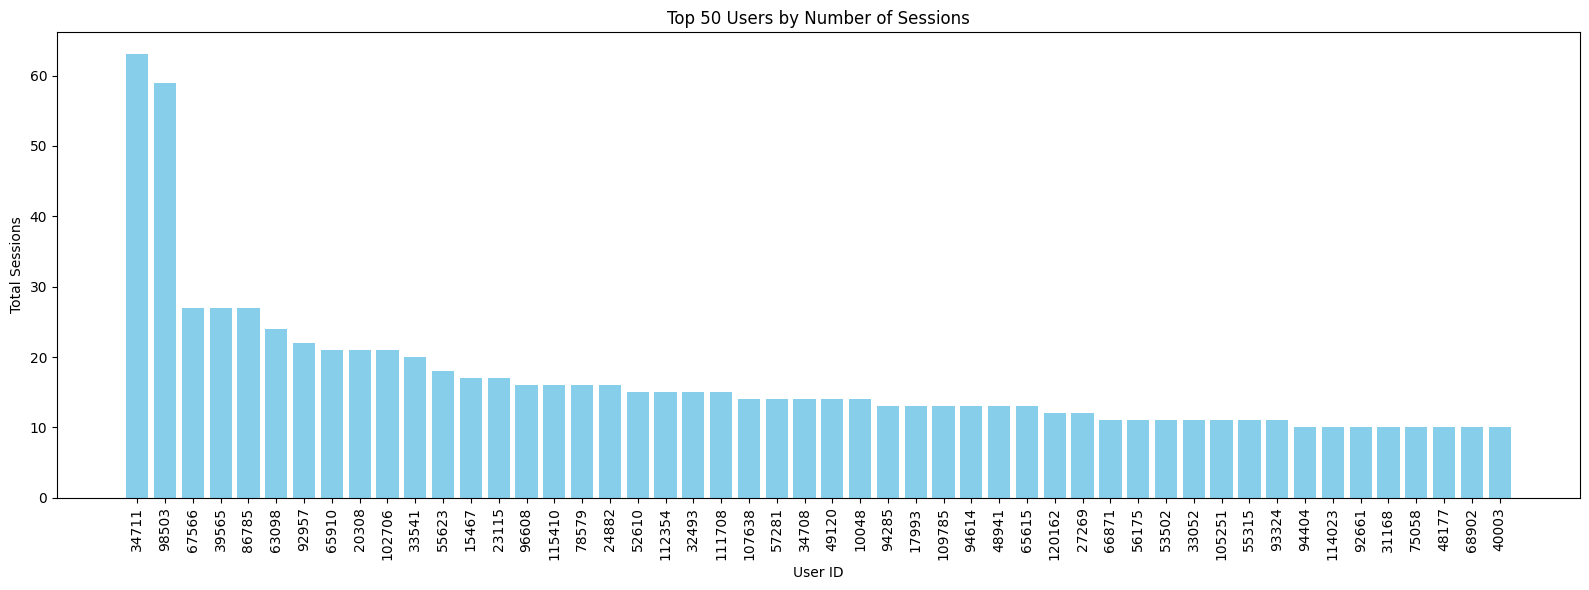

In [26]:
plt.figure(figsize=(16, 6))
plt.bar(top_50_users['userId'].astype(str), top_50_users['total_sessions'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Top 50 Users by Number of Sessions')
plt.xlabel('User ID')
plt.ylabel('Total Sessions')
plt.tight_layout()
plt.show()

In [27]:
test_df.describe()

,date,totals.bounces,totalHits,new_visits,pageViews,totals.visits,sessionId,sessionNumber,sessionStart,userId,locationZone,gclIdPresent
count,2.900600e+04,11732.0,29006.000000,20094.0,29003.000000,29006.0,2.900600e+04,29006.000000,2.900600e+04,29006.000000,29006.0,29006.000000
mean,2.016855e+07,1.0,10.659519,1.0,8.470813,1.0,1.493320e+09,2.595980,1.493320e+09,61327.854134,8.0,0.038268
std,6.200443e+03,0.0,19.771218,0.0,14.561705,0.0,1.532493e+07,9.333323,1.532493e+07,35253.344987,0.0,0.191846
min,2.016080e+07,1.0,1.000000,1.0,1.000000,1.0,1.470035e+09,1.000000,1.470035e+09,8.000000,8.0,0.000000
25%,2.016112e+07,1.0,1.000000,1.0,1.000000,1.0,1.479931e+09,1.000000,1.479931e+09,31006.500000,8.0,0.000000
50%,2.017041e+07,1.0,2.000000,1.0,2.000000,1.0,1.491492e+09,1.000000,1.491492e+09,61430.500000,8.0,0.000000
75%,2.017091e+07,1.0,12.000000,1.0,10.000000,1.0,1.505148e+09,2.000000,1.505148e+09,91866.250000,8.0,0.000000
max,2.018043e+07,1.0,500.000000,1.0,466.000000,1.0,1.525152e+09,334.000000,1.525152e+09,122268.000000,8.0,1.000000


 **Interpretation Summary**
purchaseValue is heavily skewed: most users don't buy, but some spend a lot. Consider a log transformation or regression on non-zero purchases only.

sessionNumber, pageViews, and totalHits might be good indicators of user engagement and could correlate with conversion.

gclIdPresent and AdWords-related columns are sparse but might indicate paid traffic users.

totals.visits, locationZone, and possibly totals.bounces seem uninformative or constant — may be dropped or verified.

Time-based fields (date, sessionStart) could help analyze trends, seasonality, or create temporal features like "day of week" or "hour of session".



In [28]:
print("\nNumber of unique values for categorical features:")
categorical_cols = train_df.select_dtypes(include=['object']).columns
if not categorical_cols.empty:
    for col in categorical_cols:
        print(f"  Column '{col}': {train_df[col].nunique()} unique values")


Number of unique values for categorical features:
  Column 'trafficSource.isTrueDirect': 1 unique values
  Column 'browser': 34 unique values
  Column 'device.screenResolution': 1 unique values
  Column 'trafficSource.keyword': 566 unique values
  Column 'screenSize': 1 unique values
  Column 'geoCluster': 5 unique values
  Column 'device.mobileDeviceBranding': 1 unique values
  Column 'device.mobileInputSelector': 1 unique values
  Column 'trafficSource.campaign': 28 unique values
  Column 'device.mobileDeviceMarketingName': 1 unique values
  Column 'geoNetwork.networkDomain': 3 unique values
  Column 'device.operatingSystemVersion': 1 unique values
  Column 'device.flashVersion': 1 unique values
  Column 'geoNetwork.region': 388 unique values
  Column 'trafficSource': 161 unique values
  Column 'geoNetwork.networkLocation': 1 unique values
  Column 'os': 18 unique values
  Column 'geoNetwork.subContinent': 23 unique values
  Column 'trafficSource.medium': 7 unique values
  Column 'b

In [29]:
print("\nNumber of unique values for categorical features:")
categorical_cols = test_df.select_dtypes(include=['object']).columns
if not categorical_cols.empty:
    for col in categorical_cols:
        print(f"  Column '{col}': {test_df[col].nunique()} unique values")


Number of unique values for categorical features:
  Column 'userChannel': 8 unique values
  Column 'browser': 26 unique values
  Column 'device.browserSize': 1 unique values
  Column 'device.browserVersion': 1 unique values
  Column 'deviceType': 3 unique values
  Column 'device.flashVersion': 1 unique values
  Column 'device.language': 1 unique values
  Column 'device.mobileDeviceBranding': 1 unique values
  Column 'device.mobileDeviceMarketingName': 1 unique values
  Column 'device.mobileDeviceModel': 1 unique values
  Column 'device.mobileInputSelector': 1 unique values
  Column 'os': 14 unique values
  Column 'device.operatingSystemVersion': 1 unique values
  Column 'device.screenColors': 1 unique values
  Column 'device.screenResolution': 1 unique values
  Column 'geoNetwork.city': 447 unique values
  Column 'geoNetwork.continent': 6 unique values
  Column 'locationCountry': 162 unique values
  Column 'geoNetwork.metro': 78 unique values
  Column 'geoNetwork.networkDomain': 3 uni

Potentially Useful Features (Diverse, Varying):
These columns have enough variation to potentially contribute predictive power:
| Column                       | Unique Values | Notes                                                  |
| ---------------------------- | ------------- | ------------------------------------------------------ |
| `browser`                    | 34            | Browser type – useful for tech segmentation            |
| `trafficSource.adContent`    | 53            | Ad variation – may relate to targeting strategy        |
| `trafficSource.keyword`      | 566           | High-cardinality – may need encoding or grouping       |
| `trafficSource.campaign`     | 28            | Shows campaign diversity                               |
| `geoNetwork.region`          | 388           | Very granular – might need grouping                    |
| `trafficSource`              | 161           | Broad source labels (some might be rare)               |
| `os`                         | 18            | Operating systems – potentially useful                 |
| `geoNetwork.subContinent`    | 23            | Useful for regional targeting                          |
| `trafficSource.medium`       | 7             | Common traffic channel (e.g., organic, cpc)            |
| `locationCountry`            | 193           | Can be grouped by region if needed                     |
| `geoNetwork.city`            | 695           | High-cardinality – needs reduction or encoding         |
| `geoNetwork.metro`           | 104           | Can be grouped or encoded                              |
| `trafficSource.referralPath` | 941           | High-cardinality – probably needs cleaning or grouping |
| `userChannel`                | 8             | Could relate to customer segmentation                  |
| `geoNetwork.continent`       | 6             | Broad but useful geographic segment                    |


Low Variance or Constant Features:
These columns have only 1 unique value, so they don’t provide any useful information for modeling:
| Column                                     |
| ------------------------------------------ |
| `trafficSource.isTrueDirect`               |
| `device.screenResolution`                  |
| `screenSize`                               |
| `device.mobileDeviceBranding`              |
| `device.mobileInputSelector`               |
| `device.mobileDeviceMarketingName`         |
| `geoNetwork.networkLocation`               |
| `device.operatingSystemVersion`            |
| `device.flashVersion`                      |
| `trafficSource.adwordsClickInfo.isVideoAd` |
| `browserMajor`                             |
| `device.browserSize`                       |
| `socialEngagementType`                     |
| `device.mobileDeviceModel`                 |
| `device.language`                          |
| `device.browserVersion`                    |
| `device.screenColors`                      |


 Low to Moderate Cardinality (Might Still Be Useful):
| Column                                         | Unique Values | Notes                                  |
| ---------------------------------------------- | ------------- | -------------------------------------- |
| `trafficSource.adwordsClickInfo.slot`          | 3             | Might relate to ad position            |
| `geoNetwork.networkDomain`                     | 3             | Could still hold meaning               |
| `trafficSource.adwordsClickInfo.adNetworkType` | 2             | Binary feature from AdWords            |
| `deviceType`                                   | 3             | Important for device behavior analysis |


In [30]:
#import numpy as np

#numeric_df = df.select_dtypes(include=[np.number])
#abs_vals = numeric_df.abs()
#large_vals = (abs_vals > 1e6)
#print("Large values (abs > 1e6):")
#print(numeric_df[large_vals.any(axis=1)])
#large_vals_count = large_vals.sum()
#print("Count of large non-zero values (abs > 1e-6) per column:\n")
#print(large_vals_count)


In [31]:
#small_vals = (abs_vals < 1e-6) & (abs_vals > 0)
#print("Small non-zero values (abs < 1e-6):")
#print(numeric_df[small_vals.any(axis=1)])
#print("Has inf:\n", np.isinf(numeric_df).any())
#print("Has NaN:\n", numeric_df.isna().any())


In [32]:
#small_vals_count = small_vals.sum()
#print("Count of small non-zero values (abs < 1e-6) per column:\n")
#print(small_vals_count)

In [33]:
import numpy as np

print("NaN count:\n", train_df.isna().sum())
print("Inf count:\n", np.isinf(train_df.select_dtypes(include=[float, int])).sum())

NaN count:
 trafficSource.isTrueDirect          73133
purchaseValue                           0
browser                                 0
device.screenResolution                 0
trafficSource.keyword               71861
screenSize                              0
geoCluster                              0
device.mobileDeviceBranding             0
device.mobileInputSelector              0
userId                                  0
trafficSource.campaign                  0
device.mobileDeviceMarketingName        0
geoNetwork.networkDomain                0
gclIdPresent                            0
device.operatingSystemVersion           0
sessionNumber                           0
device.flashVersion                     0
geoNetwork.region                       0
trafficSource                           0
totals.visits                           0
geoNetwork.networkLocation              0
sessionId                               0
os                                      0
geoNetwork.subContinen

In [34]:
print("\nPotential Missing Values:")
print(train_df.isnull().sum())


Potential Missing Values:
trafficSource.isTrueDirect          73133
purchaseValue                           0
browser                                 0
device.screenResolution                 0
trafficSource.keyword               71861
screenSize                              0
geoCluster                              0
device.mobileDeviceBranding             0
device.mobileInputSelector              0
userId                                  0
trafficSource.campaign                  0
device.mobileDeviceMarketingName        0
geoNetwork.networkDomain                0
gclIdPresent                            0
device.operatingSystemVersion           0
sessionNumber                           0
device.flashVersion                     0
geoNetwork.region                       0
trafficSource                           0
totals.visits                           0
geoNetwork.networkLocation              0
sessionId                               0
os                                      0
geoNetw

In [35]:
#numerical_cols = df.select_dtypes(include=['number']).columns
#for col in numerical_cols:
   # Q1 = df[col].quantile(0.25)
    #Q3 = df[col].quantile(0.75)
    #IQR = Q3 - Q1
    #lower_bound = Q1 - 1.5 * IQR
    #upper_bound = Q3 + 1.5 * IQR
    #outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    #if not outliers.empty:
        #print(f"  Column '{col}': Found {len(outliers)} potential outliers.")

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#numerical_cols = df.select_dtypes(include=['number']).columns
#if not numerical_cols.empty:
    #plt.figure(figsize=(12, 6))
    #sns.boxplot(data=df[numerical_cols])
    #plt.title('Quartile Range (Box Plot) of Numerical Columns')
    #plt.ylabel('Value')
    #plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    #plt.tight_layout() # Adjust layout to prevent labels overlapping
    #plt.show()
#else:
    #print("\nCannot draw quartile range as data is not loaded or is empty.")

In [38]:
# Convert 'True' to 1, everything else (including NaN or empty) to 0
train_df['trafficSource.isTrueDirect'] = (train_df['trafficSource.isTrueDirect'] == 'True').astype(int)
test_df['trafficSource.isTrueDirect'] = (test_df['trafficSource.isTrueDirect'] == 'True').astype(int)

In [39]:
#print(df['trafficSource.adwordsClickInfo.isVideoAd'].value_counts(dropna=False))

In [40]:
#df.groupby('trafficSource.adwordsClickInfo.isVideoAd')['purchaseValue'].mean()

In [41]:
# First, convert it to binary if you haven't already
#df['trafficSource.adwordsClickInfo.isVideoAd_flag'] = (df['trafficSource.adwordsClickInfo.isVideoAd'] != 'False').astype(int)

# Now check mean purchaseValue by flag (0 = False, 1 = missing/possibly video)
#df.groupby('trafficSource.adwordsClickInfo.isVideoAd_flag')['purchaseValue'].mean()


In [42]:
#df['trafficSource.adwordsClickInfo.isVideoAd'] = (df['trafficSource.adwordsClickInfo.isVideoAd'] != 'False').astype(int)



* (True, False, True) → (1, 0, 1)

In [43]:
train_df.groupby('totals.bounces')['purchaseValue'].mean()

totals.bounces
1.0    0.0
Name: purchaseValue, dtype: float64

In [44]:
train_df.groupby('trafficSource')['totals.bounces'].mean().sort_values(ascending=False).head(10)

trafficSource
(direct)                 1.0
m.sogou.com              1.0
phandroid.com            1.0
ph.search.yahoo.com      1.0
outlook.live.com         1.0
optimize.google.com      1.0
online-metrics.com       1.0
myactivity.google.com    1.0
msn.com                  1.0
moma.corp.google.com     1.0
Name: totals.bounces, dtype: float64

In [45]:
train_df.groupby('trafficSource.campaign')['totals.bounces'].mean().sort_values(ascending=False).head(10)

trafficSource.campaign
"google + redesign/Accessories March 17" All Users            1.0
Page: contains "/google+redesign/drinkware"                   1.0
Value Shoppers Affinity                                       1.0
Technology/Technophiles                                       1.0
Technology/Mobile Enthusiasts                                 1.0
Sports & Fitness/Health & Fitness Buffs                       1.0
Smart Display Campaign                                        1.0
Run of Network Line Item                                      1.0
Retail (DO NOT EDIT owners nophakun and tianyu)               1.0
Page: contains "/google+redesign/office" Similar Audiences    1.0
Name: totals.bounces, dtype: float64

In [46]:
train_df.groupby('deviceType')['totals.bounces'].mean().sort_values(ascending=False)

deviceType
desktop    1.0
mobile     1.0
tablet     1.0
Name: totals.bounces, dtype: float64

In [47]:
train_df.groupby('userChannel')['totals.bounces'].mean().sort_values(ascending=False)

userChannel
(Other)           1.0
Affiliates        1.0
Direct            1.0
Display           1.0
Organic Search    1.0
Paid Search       1.0
Referral          1.0
Social            1.0
Name: totals.bounces, dtype: float64

In [48]:
train_df['totals.bounces'] = train_df['totals.bounces'].fillna(0).astype(int)
test_df['totals.bounces'] = test_df['totals.bounces'].fillna(0).astype(int)

In [49]:
train_df.groupby('deviceType')['totals.bounces'].mean()

deviceType
desktop    0.370143
mobile     0.517099
tablet     0.479556
Name: totals.bounces, dtype: float64

In [50]:
print(train_df['userChannel'].value_counts())
print(train_df['trafficSource.campaign'].value_counts())


userChannel
Organic Search    46925
Referral          21932
Social            20786
Direct            18886
Paid Search        3406
Display            2301
Affiliates         1777
(Other)              10
Name: count, dtype: int64
trafficSource.campaign
(not set)                                                               110280
Data Share Promo                                                          1777
AW - Dynamic Search Ads Whole Site                                        1497
1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS                     855
AW - Accessories                                                           763
1000557 | GA | US | en | Hybrid | GDN Remarketing                          555
Smart Display Campaign                                                      87
"google + redesign/Accessories March 17" All Users Similar Audiences        44
"google + redesign/Accessories March 17" All Users                          27
Sports & Fitness/Health & Fitness Bu

In [51]:
# Impute missing pageViews with median
#Use median rather than mean due to extreme outliers.
# Calculate median from train data
median_page_views = train_df['pageViews'].median()

# Fill missing in train
train_df['pageViews'] = train_df['pageViews'].fillna(median_page_views)

# Fill missing in test using train median
test_df['pageViews'] = test_df['pageViews'].fillna(median_page_views)



In [52]:
# Top 20 rows with highest pageViews
top_20_pageviews = train_df.nlargest(10, 'pageViews')

# Display the result
print(top_20_pageviews[['pageViews']])


        pageViews
6522        469.0
38201       469.0
103343      466.0
65743       431.0
106831      431.0
52721       400.0
81404       400.0
16966       351.0
46631       343.0
59842       343.0


In [53]:
# Find the row with the max pageViews
max_pageviews_row = train_df.loc[train_df['pageViews'].idxmax()]

# Extract the userId and pageViews
print(f"UserId with highest pageViews in a single session: {max_pageviews_row['userId']}")
print(f"PageViews: {max_pageviews_row['pageViews']}")

UserId with highest pageViews in a single session: 18505
PageViews: 469.0


In [54]:
# Sum pageViews per userId
pageviews_per_user = train_df.groupby('userId')['pageViews'].sum()

# Find the user with max total pageViews
max_user = pageviews_per_user.idxmax()
max_pageviews = pageviews_per_user.max()

print(f"UserId with highest total pageViews: {max_user}")
print(f"Total PageViews: {max_pageviews}")

UserId with highest total pageViews: 34711
Total PageViews: 1729.0


In [55]:
print(top_20_pageviews[['userId','pageViews', 'sessionId', 'purchaseValue']])


        userId  pageViews   sessionId  purchaseValue
6522     18505      469.0  1472216705   9.098000e+07
38201    18505      469.0  1472216705   9.098000e+07
103343   73333      466.0  1488663704   8.796000e+07
65743    56047      431.0  1472132217   1.720930e+09
106831   56047      431.0  1472132217   1.720930e+09
52721    88105      400.0  1489823400   1.339500e+08
81404    88105      400.0  1489823400   1.339500e+08
16966    97674      351.0  1472172400   1.134900e+08
46631   110755      343.0  1489999542   4.719200e+08
59842   110755      343.0  1489999542   4.719200e+08


In [56]:
cap = train_df['pageViews'].quantile(0.999)
train_df['pageViews'] = np.where(train_df['pageViews'] > cap, cap, train_df['pageViews'])


In [57]:
# Top 20 rows with highest pageViews
top_20_pageviews = train_df.nlargest(250, 'pageViews')

# Display the result
print(top_20_pageviews[['pageViews']])


        pageViews
1217        118.0
4218        118.0
4426        118.0
5942        118.0
5952        118.0
...           ...
68449       100.0
89092       100.0
90681       100.0
103452      100.0
2682         99.0

[250 rows x 1 columns]


In [58]:
# For new_visits: fill NaN with 0 and convert to int
##test_df['new_visits'] = test_df['new_visits'].fillna(0).astype(int)

# For trafficSource.keyword: fill NaN with 'unknown'
#train_df['trafficSource.keyword'] = train_df['trafficSource.keyword'].fillna('unknown')
#test_df['trafficSource.keyword'] = test_df['trafficSource.keyword'].fillna('unknown')

# For trafficSource.adContent: fill NaN with 'none'
#train_df['trafficSource.adContent'] = train_df['trafficSource.adContent'].fillna('none')
#test_df['trafficSource.adContent'] = test_df['trafficSource.adContent'].fillna('none')

# For trafficSource.referralPath: fill NaN with 'unknown'
#train_df['trafficSource.referralPath'] = train_df['trafficSource.referralPath'].fillna('unknown')
#test_df['trafficSource.referralPath'] = test_df['trafficSource.referralPath'].fillna('unknown')

cols_to_remove = ['device.language', 'device.flashVersion', 'totals.visits']

train_df.drop(columns=cols_to_remove, inplace=True)
test_df.drop(columns=cols_to_remove, inplace=True)


In [59]:
# 1. Compute average hits per user from train data only
user_avg_hits = train_df.groupby('userId')['totalHits'].mean().rename('avgSessionHits')

# 2. Merge into train_df
train_df = train_df.merge(user_avg_hits, on='userId', how='left')

# 3. Merge into test_df (users not in training will get NaN)
test_df = test_df.merge(user_avg_hits, on='userId', how='left')

# 4. Handle new users in test data
# Optional: fill with overall train average OR 0
overall_avg_hits = train_df['avgSessionHits'].mean()
test_df['avgSessionHits'] = test_df['avgSessionHits'].fillna(overall_avg_hits)

# 5. Optional: add a flag for new users in test set
test_df['is_new_user'] = test_df['avgSessionHits'].isna().astype(int)

# 6. (Optional) Fill avgSessionHits in train as well if any are missing (unlikely)
train_df['avgSessionHits'] = train_df['avgSessionHits'].fillna(overall_avg_hits)


In [60]:
test_df.describe()

,date,totals.bounces,totalHits,new_visits,pageViews,trafficSource.isTrueDirect,sessionId,sessionNumber,sessionStart,userId,locationZone,gclIdPresent,avgSessionHits,is_new_user
count,2.900600e+04,29006.000000,29006.000000,20094.0,29006.000000,29006.0,2.900600e+04,29006.000000,2.900600e+04,29006.000000,29006.0,29006.000000,29006.000000,29006.0
mean,2.016855e+07,0.404468,10.659519,1.0,8.470144,0.0,1.493320e+09,2.595980,1.493320e+09,61327.854134,8.0,0.038268,14.053574,0.0
std,6.200443e+03,0.490797,19.771218,0.0,14.561100,0.0,1.532493e+07,9.333323,1.532493e+07,35253.344987,0.0,0.191846,14.080505,0.0
min,2.016080e+07,0.000000,1.000000,1.0,1.000000,0.0,1.470035e+09,1.000000,1.470035e+09,8.000000,8.0,0.000000,1.000000,0.0
25%,2.016112e+07,0.000000,1.000000,1.0,1.000000,0.0,1.479931e+09,1.000000,1.479931e+09,31006.500000,8.0,0.000000,10.607371,0.0
50%,2.017041e+07,0.000000,2.000000,1.0,2.000000,0.0,1.491492e+09,1.000000,1.491492e+09,61430.500000,8.0,0.000000,10.607371,0.0
75%,2.017091e+07,1.000000,12.000000,1.0,10.000000,0.0,1.505148e+09,2.000000,1.505148e+09,91866.250000,8.0,0.000000,10.607371,0.0
max,2.018043e+07,1.000000,500.000000,1.0,466.000000,0.0,1.525152e+09,334.000000,1.525152e+09,122268.000000,8.0,1.000000,500.000000,0.0


In [61]:
# View rows where the user is new (not seen in training)
new_users = test_df[test_df['is_new_user'] == 0]

# Display a few of them
print(new_users[['userId', 'is_new_user']].head())

   userId  is_new_user
0   59555            0
1    6394            0
2   38969            0
3  120027            0
4   69453            0


In [62]:
# From training data only
user_session_count = train_df.groupby('userId')['sessionId'].nunique().rename('totalSessions')

# Merge into train
train_df = train_df.merge(user_session_count, on='userId', how='left')

# Merge into test (new users will get NaN)
test_df = test_df.merge(user_session_count, on='userId', how='left')

# Fill NaNs in test (for new users) with 1 or 0 (whichever makes sense)
test_df['totalSessions'] = test_df['totalSessions'].fillna(0).astype(int)


In [63]:
# View rows where the user is new (not seen in training)
new_users = test_df[test_df['totalSessions'] == 0]

# Display a few of them
print(new_users[['userId', 'totalSessions']].head())

    userId  totalSessions
1     6394              0
2    38969              0
4    69453              0
8    37130              0
10   56043              0


In [64]:
test_df.describe()

,date,totals.bounces,totalHits,new_visits,pageViews,trafficSource.isTrueDirect,sessionId,sessionNumber,sessionStart,userId,locationZone,gclIdPresent,avgSessionHits,is_new_user,totalSessions
count,2.900600e+04,29006.000000,29006.000000,20094.0,29006.000000,29006.0,2.900600e+04,29006.000000,2.900600e+04,29006.000000,29006.0,29006.000000,29006.000000,29006.0,29006.000000
mean,2.016855e+07,0.404468,10.659519,1.0,8.470144,0.0,1.493320e+09,2.595980,1.493320e+09,61327.854134,8.0,0.038268,14.053574,0.0,0.443391
std,6.200443e+03,0.490797,19.771218,0.0,14.561100,0.0,1.532493e+07,9.333323,1.532493e+07,35253.344987,0.0,0.191846,14.080505,0.0,1.731887
min,2.016080e+07,0.000000,1.000000,1.0,1.000000,0.0,1.470035e+09,1.000000,1.470035e+09,8.000000,8.0,0.000000,1.000000,0.0,0.000000
25%,2.016112e+07,0.000000,1.000000,1.0,1.000000,0.0,1.479931e+09,1.000000,1.479931e+09,31006.500000,8.0,0.000000,10.607371,0.0,0.000000
50%,2.017041e+07,0.000000,2.000000,1.0,2.000000,0.0,1.491492e+09,1.000000,1.491492e+09,61430.500000,8.0,0.000000,10.607371,0.0,0.000000
75%,2.017091e+07,1.000000,12.000000,1.0,10.000000,0.0,1.505148e+09,2.000000,1.505148e+09,91866.250000,8.0,0.000000,10.607371,0.0,0.000000
max,2.018043e+07,1.000000,500.000000,1.0,466.000000,0.0,1.525152e+09,334.000000,1.525152e+09,122268.000000,8.0,1.000000,500.000000,0.0,51.000000


In [65]:
# 1. Create the 'isReturning' flag in train
train_df['isReturning'] = (train_df['sessionNumber'] > 1).astype(int)

# 2. Compute return rate per user based on training data only
user_return_rate = train_df.groupby('userId')['isReturning'].mean().rename('returnRate')

# 3. Merge returnRate into train
train_df = train_df.merge(user_return_rate, on='userId', how='left')

# 4. Apply the same logic to test
# First, create isReturning column in test
test_df['isReturning'] = (test_df['sessionNumber'] > 1).astype(int)

# Merge returnRate from train into test
test_df = test_df.merge(user_return_rate, on='userId', how='left')

# 5. Handle new users in test (those not seen in train)
# Option 1: Fill with 0 (assume no prior return history)
test_df['returnRate'] = test_df['returnRate'].fillna(0)

# Option 2 (alternative): Fill with average return rate from train
# avg_return_rate = train_df['returnRate'].mean()
# test_df['returnRate'] = test_df['returnRate'].fillna(avg_return_rate)


In [66]:
# Ensure 'date' column is string and convert it to datetime
train_df['date'] = pd.to_datetime(train_df['date'].astype(str), format='%Y%m%d')
test_df['date'] = pd.to_datetime(test_df['date'].astype(str), format='%Y%m%d')

# Step 1: Group by userId in training data to find first and last activity
user_dates = train_df.groupby('userId')['date'].agg(['min', 'max'])

# Step 2: Calculate the span between first and last activity in days
user_dates['activeDaysSpan'] = (user_dates['max'] - user_dates['min']).dt.days

# Step 3: Merge this feature into train
train_df = train_df.merge(user_dates['activeDaysSpan'], on='userId', how='left')

# Step 4: Merge into test
test_df = test_df.merge(user_dates['activeDaysSpan'], on='userId', how='left')

# Step 5: Fill NaN for new users in test (who are not in train)
test_df['activeDaysSpan'] = test_df['activeDaysSpan'].fillna(0).astype(int)




In [67]:
test_df.head(20)

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceMarketingName,device.mobileDeviceModel,...,geoCluster,browserMajor,screenSize,gclIdPresent,avgSessionHits,is_new_user,totalSessions,isReturning,returnRate,activeDaysSpan
0,Social,2017-05-08,Chrome,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,Region_2,not available in demo dataset,medium,0,14.000000,0,2,1,0.5,0
1,Organic Search,2017-04-05,Chrome,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,Region_1,not available in demo dataset,medium,0,10.607371,0,0,0,0.0,0
2,Organic Search,2017-03-08,Safari,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,Region_5,not available in demo dataset,medium,0,10.607371,0,0,0,0.0,0
3,Referral,2017-11-13,Chrome,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,Region_2,not available in demo dataset,medium,0,24.666667,0,3,1,1.0,75
4,Organic Search,2016-12-12,Chrome,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,Region_3,not available in demo dataset,medium,0,10.607371,0,0,0,0.0,0
5,Referral,2016-12-08,Chrome,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,Region_5,not available in demo dataset,medium,0,23.000000,0,2,0,0.5,22
6,Organic Search,2016-08-25,Chrome,not available in demo dataset,not available in demo dataset,tablet,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,Region_4,not available in demo dataset,medium,0,92.000000,0,2,0,0.5,1
7,Organic Search,2017-12-07,Safari,not available in demo dataset,not available in demo dataset,mobile,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,Region_3,not available in demo dataset,medium,0,24.000000,0,1,1,0.0,0
8,Organic Search,2016-11-23,Chrome,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,Region_4,not available in demo dataset,medium,0,10.607371,0,0,0,0.0,0
9,Paid Search,2017-01-15,Chrome,not available in demo dataset,not available in demo dataset,mobile,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,Region_2,not available in demo dataset,medium,1,22.000000,0,1,0,0.0,0


In [68]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
for df in [train_df, test_df]:
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['weekday'] = df['date'].dt.weekday
    df['dayofyear'] = df['date'].dt.dayofyear
    df['season'] = df['month'].apply(month_to_season)
    df['sessionStart'] = pd.to_datetime(df['sessionStart'], unit='s')
    df['hour'] = df['sessionStart'].dt.hour


In [69]:
train_df.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.keyword,screenSize,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,...,isReturning,returnRate,activeDaysSpan,year,month,day,weekday,dayofyear,season,hour
0,0,0.0,Edge,not available in demo dataset,NaN,medium,Region_2,not available in demo dataset,not available in demo dataset,61421,...,0,0.0,0,2017,7,14,4,195,Summer,6
1,0,0.0,Chrome,not available in demo dataset,NaN,medium,Region_3,not available in demo dataset,not available in demo dataset,72287,...,0,0.0,0,2017,5,19,4,139,Spring,6
2,0,0.0,Chrome,not available in demo dataset,(not provided),medium,Region_2,not available in demo dataset,not available in demo dataset,25180,...,1,1.0,0,2017,10,20,4,293,Fall,14
3,0,0.0,Internet Explorer,not available in demo dataset,NaN,medium,Region_4,not available in demo dataset,not available in demo dataset,41295,...,0,0.0,0,2017,1,3,1,3,Winter,8
4,0,88950000.0,Chrome,not available in demo dataset,NaN,medium,Region_3,not available in demo dataset,not available in demo dataset,113697,...,0,0.0,0,2016,10,6,3,280,Fall,1


In [70]:
test_df.head()

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceMarketingName,device.mobileDeviceModel,...,isReturning,returnRate,activeDaysSpan,year,month,day,weekday,dayofyear,season,hour
0,Social,2017-05-08,Chrome,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,1,0.5,0,2017,5,8,0,128,Spring,16
1,Organic Search,2017-04-05,Chrome,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,0,0.0,0,2017,4,5,2,95,Spring,23
2,Organic Search,2017-03-08,Safari,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,0,0.0,0,2017,3,8,2,67,Spring,19
3,Referral,2017-11-13,Chrome,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,1,1.0,75,2017,11,13,0,317,Fall,17
4,Organic Search,2016-12-12,Chrome,not available in demo dataset,not available in demo dataset,desktop,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,0,0.0,0,2016,12,12,0,347,Winter,16


In [71]:
# For train_df
train_df['hits_per_pageview'] = train_df['totalHits'] / train_df['pageViews'].replace(0, 1)
train_df['bounce_proxy'] = ((train_df['pageViews'] <= 1) | (train_df['totalHits'] <= 1)).astype(int)

# For test_df
test_df['hits_per_pageview'] = test_df['totalHits'] / test_df['pageViews'].replace(0, 1)
test_df['bounce_proxy'] = ((test_df['pageViews'] <= 1) | (test_df['totalHits'] <= 1)).astype(int)


In [72]:
# For train_df
train_df['new_visits'] = train_df['new_visits'].fillna(0).astype(int)
train_df['from_ad'] = ((train_df['gclIdPresent'] == 1) | 
                       (train_df['trafficSource.medium'].str.contains('cpc|paid', case=False, na=False))).astype(int)

# For test_df
test_df['new_visits'] = test_df['new_visits'].fillna(0).astype(int)
test_df['from_ad'] = ((test_df['gclIdPresent'] == 1) | 
                      (test_df['trafficSource.medium'].str.contains('cpc|paid', case=False, na=False))).astype(int)


In [73]:
#from sklearn.preprocessing import LabelEncoder

#low_card_cols = ['deviceType', 'trafficSource.adwordsClickInfo.adNetworkType', 'userChannel', 'geoNetwork.continent']

# Create a dictionary to store encoders for each column
#encoders = {}

#for col in low_card_cols:
    #le = LabelEncoder()
    # Fit on train data
    #train_df[col] = le.fit_transform(train_df[col].astype(str))
    # Save encoder
   # encoders[col] = le
    # Use the same encoder to transform test data
    # For unseen labels in test, transform will raise error, so handle that by mapping unseen to -1
   # test_df[col] = test_df[col].astype(str).map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)



In [74]:
#import category_encoders as ce

#high_card_cols = ['geoNetwork.city', 'geoNetwork.region', 'trafficSource.keyword']

# Initialize the encoder for these columns
#target_enc = ce.TargetEncoder(cols=high_card_cols)

# Fit the encoder on train data using train target
#train_df[high_card_cols] = target_enc.fit_transform(train_df[high_card_cols], train_df['purchaseValue'])

# Use the fitted encoder to transform test data (no target needed here)
#test_df[high_card_cols] = target_enc.transform(test_df[high_card_cols])



In [75]:
#high_card_cols = ['geoNetwork.city', 'geoNetwork.region', 'trafficSource.keyword']

#for col in high_card_cols:
    # Calculate frequency encoding from train data
   # freq = train_df[col].value_counts(normalize=True)
    
    # Map frequencies to train
   # train_df[col + '_freq_enc'] = train_df[col].map(freq)
    
    # Map frequencies to test; unseen categories get NaN, fill with 0
   # test_df[col + '_freq_enc'] = test_df[col].map(freq).fillna(0)



In [76]:
numeric_train_df = train_df.select_dtypes(include=['number'])  # numeric columns in train set
correlations = numeric_train_df.corr()['purchaseValue'].sort_values(ascending=False)
print(correlations)



purchaseValue                 1.000000
totalSessions                 0.303848
log_purchaseValue             0.288212
pageViews                     0.256602
totalHits                     0.251651
sessionNumber                 0.230585
avgSessionHits                0.230277
activeDaysSpan                0.223367
returnRate                    0.124974
isReturning                   0.123070
hits_per_pageview             0.120903
hour                          0.038017
day                          -0.000217
userId                       -0.003469
gclIdPresent                 -0.005652
from_ad                      -0.007473
year                         -0.009397
month                        -0.009727
dayofyear                    -0.009776
sessionId                    -0.018537
weekday                      -0.029325
totals.bounces               -0.107116
bounce_proxy                 -0.107561
new_visits                   -0.123070
trafficSource.isTrueDirect         NaN
locationZone             

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [77]:
selected_features = correlations[correlations.abs() > 0.1].index.tolist()
selected_features.remove('purchaseValue')  # exclude target itself

print("Selected features:", selected_features)


Selected features: ['totalSessions', 'log_purchaseValue', 'pageViews', 'totalHits', 'sessionNumber', 'avgSessionHits', 'activeDaysSpan', 'returnRate', 'isReturning', 'hits_per_pageview', 'totals.bounces', 'bounce_proxy', 'new_visits']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [78]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

target_col = 'purchaseValue'

# Select categorical columns (usually object dtype)
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()

mi_scores = {}

for col in cat_cols:
    le = LabelEncoder()
    # Fit transform categorical col to numeric labels
    X = le.fit_transform(train_df[col].astype(str))
    
    y = train_df[target_col].values
    
    # Compute MI score
    mi = mutual_info_regression(X.reshape(-1, 1), y)
    
    mi_scores[col] = mi[0]

# Sort MI scores descending
mi_scores = dict(sorted(mi_scores.items(), key=lambda item: item[1], reverse=True))

# Print MI scores
for col, score in mi_scores.items():
    print(f"Mutual Information between {col} and {target_col}: {score:.4f}")



Mutual Information between userChannel and purchaseValue: 0.1362
Mutual Information between geoNetwork.subContinent and purchaseValue: 0.1154
Mutual Information between geoNetwork.continent and purchaseValue: 0.1057
Mutual Information between trafficSource.referralPath and purchaseValue: 0.0974
Mutual Information between locationCountry and purchaseValue: 0.0872
Mutual Information between os and purchaseValue: 0.0722
Mutual Information between trafficSource and purchaseValue: 0.0573
Mutual Information between geoNetwork.city and purchaseValue: 0.0464
Mutual Information between geoNetwork.region and purchaseValue: 0.0423
Mutual Information between trafficSource.medium and purchaseValue: 0.0375
Mutual Information between deviceType and purchaseValue: 0.0375
Mutual Information between browser and purchaseValue: 0.0373
Mutual Information between season and purchaseValue: 0.0365
Mutual Information between geoNetwork.metro and purchaseValue: 0.0310
Mutual Information between trafficSource.ke

In [79]:
# From your MI results (categorical)
selected_cat_features = [col for col, mi_val in mi_scores.items() if mi_val > 0.01]

# From correlation (numeric)
correlations_abs = correlations.abs()
selected_num_features = correlations_abs[correlations_abs > 0.1].index.tolist()

# Remove target itself if present
selected_num_features = [f for f in selected_num_features if f != 'purchaseValue']

print("Selected categorical features:", selected_cat_features)
print("Selected numeric features:", selected_num_features)


Selected categorical features: ['userChannel', 'geoNetwork.subContinent', 'geoNetwork.continent', 'trafficSource.referralPath', 'locationCountry', 'os', 'trafficSource', 'geoNetwork.city', 'geoNetwork.region', 'trafficSource.medium', 'deviceType', 'browser', 'season', 'geoNetwork.metro', 'trafficSource.keyword']
Selected numeric features: ['totalSessions', 'log_purchaseValue', 'pageViews', 'totalHits', 'sessionNumber', 'avgSessionHits', 'activeDaysSpan', 'returnRate', 'isReturning', 'hits_per_pageview', 'totals.bounces', 'bounce_proxy', 'new_visits']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [80]:
print("Train columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())


Train columns: ['trafficSource.isTrueDirect', 'purchaseValue', 'browser', 'device.screenResolution', 'trafficSource.keyword', 'screenSize', 'geoCluster', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'userId', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber', 'geoNetwork.region', 'trafficSource', 'geoNetwork.networkLocation', 'sessionId', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'browserMajor', 'locationCountry', 'device.browserSize', 'socialEngagementType', 'geoNetwork.city', 'geoNetwork.metro', 'pageViews', 'locationZone', 'device.mobileDeviceModel', 'trafficSource.referralPath', 'totals.bounces', 'date', 'deviceType', 'userChannel', 'device.browserVersion', 'totalHits', 'device.screenColors', 'sessionStart', 'geoNetwork.continent', 'device.isMobile', 'new_visits', 'log_purchaseValue', 'avgSessionHits', 'totalSessions', 'isReturning', 'returnRate', 

In [81]:
selected_categorical_features = [
    'userChannel', 'geoNetwork.subContinent', 'geoNetwork.continent', 'trafficSource.referralPath',
    'locationCountry', 'os', 'trafficSource', 'geoNetwork.city', 'geoNetwork.region', 'season',
    'geoNetwork.metro', 'deviceType', 'trafficSource.medium', 'browser', 'trafficSource.keyword'
]

# Filter features to those existing in both train and test
selected_categorical_features = [
    col for col in selected_categorical_features
    if col in train_df.columns and col in test_df.columns
]

print("Using categorical features:", selected_categorical_features)


Using categorical features: ['userChannel', 'geoNetwork.subContinent', 'geoNetwork.continent', 'trafficSource.referralPath', 'locationCountry', 'os', 'trafficSource', 'geoNetwork.city', 'geoNetwork.region', 'season', 'geoNetwork.metro', 'deviceType', 'trafficSource.medium', 'browser', 'trafficSource.keyword']


In [82]:
from sklearn.preprocessing import LabelEncoder

for col in selected_categorical_features:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    test_df[col] = test_df[col].astype(str).map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)




In [83]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Your selected features (both categorical already encoded, and numeric)
selected_categorical_features = [
    'geoNetwork.subContinent', 'geoNetwork.continent', 'trafficSource.referralPath',
    'locationCountry', 'os', 'trafficSource', 'geoNetwork.city', 'geoNetwork.region',
    'season', 'deviceType', 'trafficSource.medium', 'browser', 'geoNetwork.metro',
    'trafficSource.keyword'
]

selected_numeric_features = [
    'totalSessions', 'pageViews', 'totalHits', 'sessionNumber', 'avgSessionHits',
    'activeDaysSpan', 'returnRate', 'isReturning', 'hits_per_pageview',
    'totals.bounces', 'bounce_proxy', 'new_visits'
]

# Combine features
selected_features = selected_categorical_features + selected_numeric_features

# Prepare training data
X_train = train_df[selected_features].copy()
y_train = train_df['purchaseValue']

# Prepare test data
X_test = test_df[selected_features].copy()

# Log-transform the target
y_train_log = np.log1p(y_train)

# Train linear regression on log-transformed target
model = LinearRegression()
model.fit(X_train, y_train_log)

# Predict on training data for evaluation
y_train_pred_log = model.predict(X_train)
y_train_pred = np.expm1(y_train_pred_log)

# Calculate R2 score on training data
r2 = r2_score(y_train, y_train_pred)
print(f"R2 score on training data: {r2:.4f}")

# Predict on test set (log scale)
y_test_pred_log = model.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log)

# Prepare submission DataFrame
submission_df = pd.DataFrame({
    'id': test_df.index,  # fallback using index
    'purchaseValue': y_test_pred
})


# Ensure no negative predictions
submission_df['purchaseValue'] = submission_df['purchaseValue'].clip(lower=0)

# Save to CSV
submission_df.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'.")


R2 score on training data: -21112352000201125888.0000
Submission file saved as 'submission.csv'.


In [84]:
print(train_df.columns.tolist())
print(test_df.columns.tolist())


['trafficSource.isTrueDirect', 'purchaseValue', 'browser', 'device.screenResolution', 'trafficSource.keyword', 'screenSize', 'geoCluster', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'userId', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber', 'geoNetwork.region', 'trafficSource', 'geoNetwork.networkLocation', 'sessionId', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'browserMajor', 'locationCountry', 'device.browserSize', 'socialEngagementType', 'geoNetwork.city', 'geoNetwork.metro', 'pageViews', 'locationZone', 'device.mobileDeviceModel', 'trafficSource.referralPath', 'totals.bounces', 'date', 'deviceType', 'userChannel', 'device.browserVersion', 'totalHits', 'device.screenColors', 'sessionStart', 'geoNetwork.continent', 'device.isMobile', 'new_visits', 'log_purchaseValue', 'avgSessionHits', 'totalSessions', 'isReturning', 'returnRate', 'activeDaysSpan

In [85]:
print("y_train sample:", y_train[:5].values)
print("y_train_log sample:", y_train_log[:5].values)
print("y_train_pred_log sample:", y_train_pred_log[:5])
print("y_train_pred (reversed log):", y_train_pred[:5])


y_train sample: [       0.        0.        0.        0. 88950000.]
y_train_log sample: [ 0.          0.          0.          0.         18.30358498]
y_train_pred_log sample: [ 1.47040588  1.06227613  2.32364564 -0.72095098 20.6427615 ]
y_train_pred (reversed log): [ 3.35100075e+00  1.89294823e+00  9.21283882e+00 -5.13710418e-01
  9.22650905e+08]


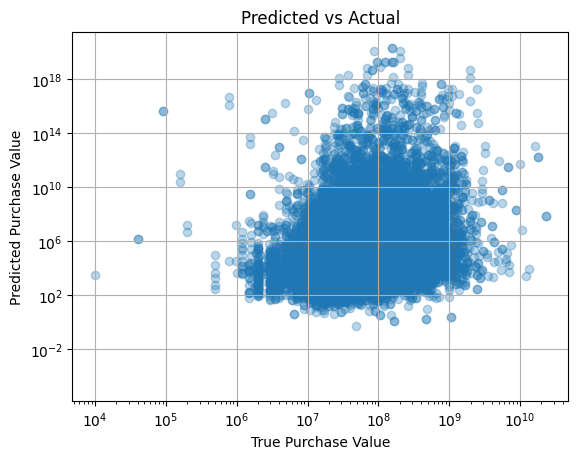

In [86]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel("True Purchase Value")
plt.ylabel("Predicted Purchase Value")
plt.title("Predicted vs Actual")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.show()


In [87]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train_log)
dummy_preds = np.expm1(dummy.predict(X_train))
print("Dummy R2:", r2_score(y_train, dummy_preds))


Dummy R2: -0.016761249430524927
